<a href="https://colab.research.google.com/github/sleetysleet/aiffel/blob/main/%EB%A9%8B%EC%A7%84_%EB%8B%A8%EC%96%B4%EC%82%AC%EC%A0%84_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 40.9 MB/s eta 0:00:00


In [4]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [5]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [7]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

--2025-06-13 02:57:00--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2025-06-13 02:57:00--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz’

korean-eng

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os

# 다운로드한 파일 이름
file = 'korean-english-park.train.tar.gz'

# 구글 드라이브의 원하는 경로 (예: MyDrive 바로 아래)
# 필요하다면 하위 폴더를 지정할 수도 있습니다 (예: '/content/drive/MyDrive/my_data/')
drive_path = '/content/drive/MyDrive/'

# 파일을 구글 드라이브로 이동
# '!'는 코랩에서 쉘 명령어를 실행할 때 사용합니다.
!mv {file} {drive_path}

In [16]:
import os

# 구글 드라이브에 저장된 압축 파일 경로
# 이전 단계에서 사용한 drive_path 변수와 downloaded_file 변수를 활용합니다.
compressed_file_path = os.path.join(drive_path, file)

# 압축을 해제할 경로 (예: 현재 작업 디렉토리)
# 원하는 다른 경로를 지정해도 됩니다.
extract_path = '/content/drive/MyDrive'

# 압축 해제 쉘 명령어
# '!'는 코랩에서 쉘 명령어를 실행할 때 사용합니다.
# -x: 압축 해제, -z: gzip으로 압축된 파일 처리, -f: 파일 지정
!tar -xzf {compressed_file_path} -C {extract_path}

In [25]:
import os
path_to_file = os.path.join(extract_path, 'korean-english-park.train.ko')

with open(path_to_file, 'r') as f:
  raw = f.read().splitlines()

print('Data Size:', len(raw))

print('Example:')
for sen in raw[:100:20]:
  print('>>>', sen)

Data Size: 94123
Example:
>>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [12]:
# import os

# # 압축 해제된 파일 경로 (현재 디렉토리에 있다고 가정)
# korean_file = 'korean-english-park.train.ko'
# english_file = 'korean-english-park.train.en'

# # 파일을 읽어서 각 줄을 리스트로 저장
# with open(korean_file, 'r', encoding='utf-8') as f:
#     korean_sentences = f.read().splitlines()

# with open(english_file, 'r', encoding='utf-8') as f:
#     english_sentences = f.read().splitlines()

# print(f"한국어 문장 개수: {len(korean_sentences)}")
# print(f"영어 문장 개수: {len(english_sentences)}")

# # 데이터 예시 출력
# print("\n--- 한국어 문장 예시 ---")
# for i in range(5):
#     print(f"{i+1}: {korean_sentences[i]}")

# print("\n--- 영어 문장 예시 ---")
# for i in range(5):
#     print(f"{i+1}: {english_sentences[i]}")

한국어 문장 개수: 94123
영어 문장 개수: 94123

--- 한국어 문장 예시 ---
1: 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
2: 모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.
3: 그러나 이것은 또한 책상도 필요로 하지 않는다.
4: 79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.
5: 정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.

--- 영어 문장 예시 ---
1: Much of personal computing is about "can you top this?"
2: so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.
3: Like all optical mice, But it also doesn't need a desk.
4: uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.
5: Intelligence officials have revealed a spate of foiled plots on ships in Southeast Asia and are warning that a narrow stretch of water carrying almost one third of the world's maritime trade is vulnerable to a terror attack.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


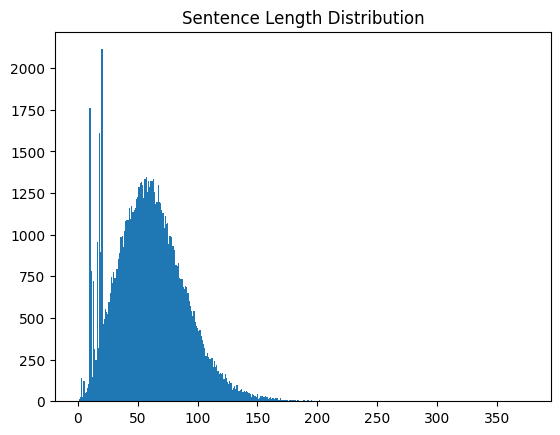

In [26]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print('문장의 최단 길이:', min_len)
print('문장의 최장 길이:', max_len)
print('문장의 평균 길이:', sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('Sentence Length Distribution')
plt.show()